# Website Traffic & Conversion Data

# Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Date Preparation

In [8]:
df = pd.read_excel("WebTraffic_Q1_2025.xlsx", sheet_name="sheet1")
df


,VisitDate,SessionDuration,PageViews,ReferralSource,DeviceType,Platform,BounceRate,Conversions
0,2025-03-17,140.78,3.0,Referral,Tablet,Windows,88.24,1
1,2025-01-03,903.04,3.0,Paid Search,Tablet,Windows,48.78,0
2,2025-02-25,395.02,5.0,Social Media,Mobile,macOS,51.13,0
3,2025-01-29,273.88,6.0,Referral,Desktop,macOS,60.36,0
4,2025-03-23,50.89,5.0,Organic Search,Mobile,Linux,88.83,1
...,...,...,...,...,...,...,...,...
595,2025-02-19,192.71,4.0,Organic Search,Mobile,Linux,58.28,0
596,2025-03-15,330.39,3.0,Social Media,Desktop,iOS,58.24,0
597,2025-01-14,56.74,6.0,Organic Search,Mobile,macOS,26.26,0
598,2025-01-14,64.07,4.0,Social Media,Mobile,macOS,49.26,0


In [45]:
df['VisitDate'] = pd.to_datetime(df['VisitDate'], errors='coerce')

In [18]:
df['Month'] = df['VisitDate'].dt.month_name()
df['DayOfWeek'] = df['VisitDate'].dt.day_name()
df['WeekNumber'] = df['VisitDate'].dt.isocalendar().week

In [19]:
df

,VisitDate,SessionDuration,PageViews,ReferralSource,DeviceType,Platform,BounceRate,Conversions,Month,DayOfWeek,weekNumber,WeekNumber
0,2025-03-17,140.78,3.0,Referral,Tablet,Windows,88.24,1,March,Monday,12,12
1,2025-01-03,903.04,3.0,Paid Search,Tablet,Windows,48.78,0,January,Friday,1,1
2,2025-02-25,395.02,5.0,Social Media,Mobile,macOS,51.13,0,February,Tuesday,9,9
3,2025-01-29,273.88,6.0,Referral,Desktop,macOS,60.36,0,January,Wednesday,5,5
4,2025-03-23,50.89,5.0,Organic Search,Mobile,Linux,88.83,1,March,Sunday,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...
595,2025-02-19,192.71,4.0,Organic Search,Mobile,Linux,58.28,0,February,Wednesday,8,8
596,2025-03-15,330.39,3.0,Social Media,Desktop,iOS,58.24,0,March,Saturday,11,11
597,2025-01-14,56.74,6.0,Organic Search,Mobile,macOS,26.26,0,January,Tuesday,3,3
598,2025-01-14,64.07,4.0,Social Media,Mobile,macOS,49.26,0,January,Tuesday,3,3


In [22]:
df.isnull().sum()

VisitDate          0
SessionDuration    0
PageViews          0
ReferralSource     0
DeviceType         0
Platform           0
BounceRate         0
Conversions        0
Month              0
DayOfWeek          0
weekNumber         0
WeekNumber         0
dtype: int64

In [21]:
df['SessionDuration'] = pd.to_numeric(df['SessionDuration'],errors='coerce')
df['PageViews'] = pd.to_numeric(df['PageViews'],errors='coerce')
df.dropna(subset=['VisitDate','SessionDuration','PageViews'],inplace=True)

# 2️⃣ Traffic Trend Analysis

## Daily Sessions for Q1

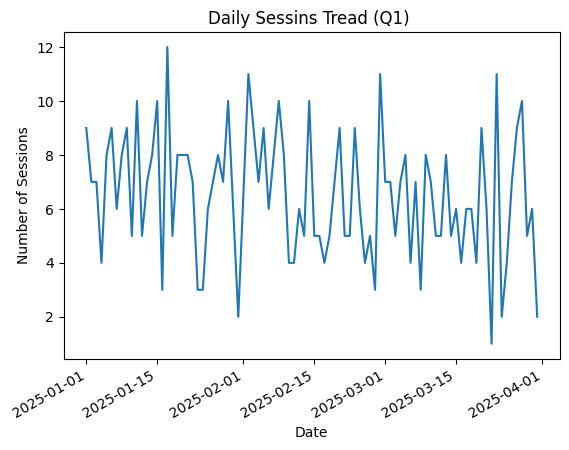

In [23]:
q1_data = df[df['VisitDate'].dt.month.isin([1,2,3])]
daily_sessions = q1_data.groupby('VisitDate').size()
plt.figure()
daily_sessions.plot() 
plt.title("Daily Sessins Tread (Q1) ")
plt.xlabel("Date")
plt.ylabel("Number of Sessions")
plt.show()

## Weekly Traffic Comparison (Jan - Mar)

<Figure size 640x480 with 0 Axes>

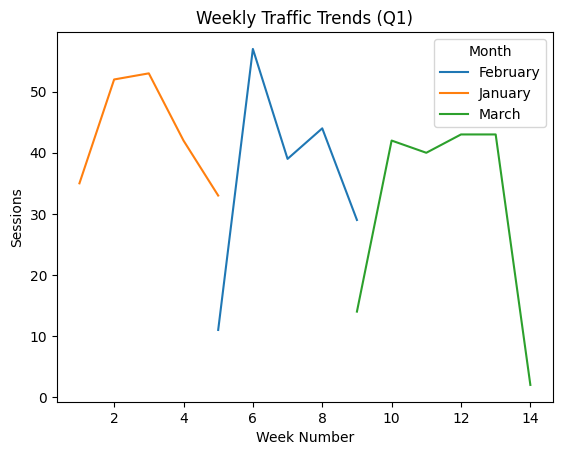

In [24]:
weekly_trends = q1_data.groupby(['Month', 'weekNumber']).size().unstack(level=0)

plt.figure()
weekly_trends.plot()
plt.title("Weekly Traffic Trends (Q1)")
plt.xlabel("Week Number")
plt.ylabel("Sessions")
plt.show()


# 3️⃣ User Engagement Metrics

In [25]:
avg_session_duration = df['SessionDuration'].mean()
avg_page_views = df['PageViews'].mean()

print("Average Session Duration : ",round(avg_session_duration, 2))
print("Average Page Views per Session : ",round(avg_page_views, 2))

Average Session Duration :  313.72
Average Page Views per Session :  4.94


### Top 5 Referral Sources

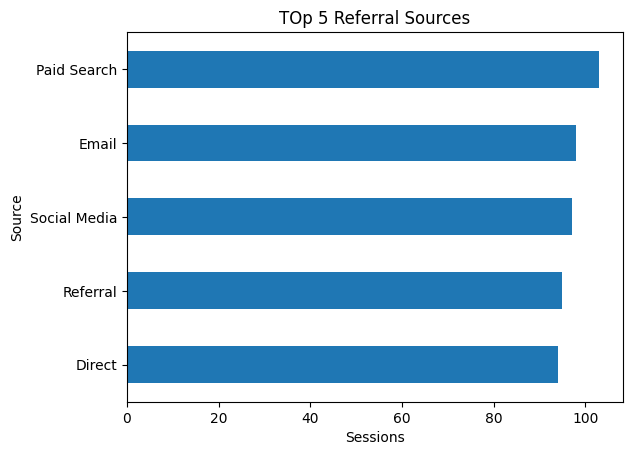

In [26]:
top_referrals = df['ReferralSource'].value_counts().head(5)

plt.figure()
top_referrals.sort_values().plot(kind='barh')
plt.title("TOp 5 Referral Sources")
plt.xlabel("Sessions")
plt.ylabel("Source")
plt.show()

# 4️⃣ Conversion Analysis

In [27]:
total_sessions = len(df)
total_conversions = df['Conversions'].sum()
conversion_rate = total_conversions / total_sessions 
print("Overall Conversion Rate : ",round(conversion_rate * 100, 2), "%")


Overall Conversion Rate :  14.85 %


### Conversion Source Distribution 

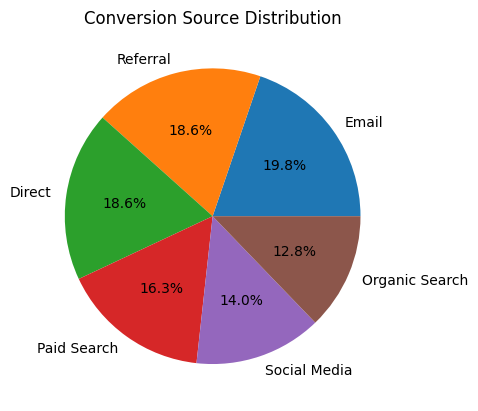

In [28]:
conversion_sources = df[df['Conversions'] == 1]['ReferralSource'].value_counts()

plt.figure()
conversion_sources.plot(kind='pie', autopct='%1.1f%%')
plt.title("Conversion Source Distribution")
plt.ylabel("")
plt.show()


# 5️⃣ Device & Platform Insights

### Average Session Duration by Device 

In [29]:
device_duration = df.groupby('DeviceType')['SessionDuration'].mean()
print(device_duration )

DeviceType
Desktop    318.263822
Mobile     311.352300
Tablet     311.636436
Name: SessionDuration, dtype: float64


### Conversion Rate By Device (Grouped Bar)

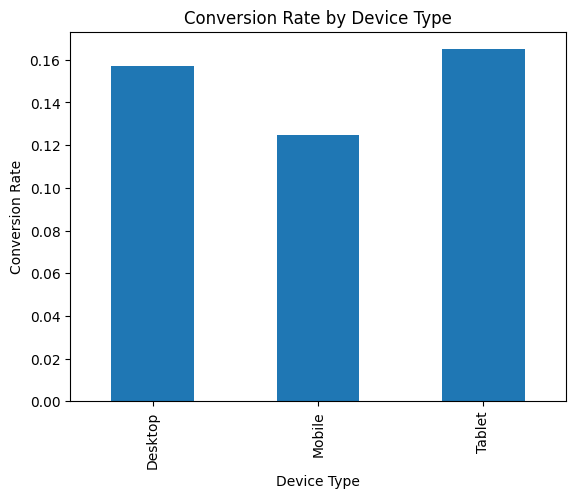

In [30]:
device_conversion = df.groupby('DeviceType')['Conversions'].mean()

plt.figure()
device_conversion.plot(kind='bar')
plt.title("Conversion Rate by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Conversion Rate")
plt.show()

# 6️⃣ Bounce Rate Pattern

## Daliy Average Bounce Rate

Text(0, 0.5, 'Bounce Rate (%)')

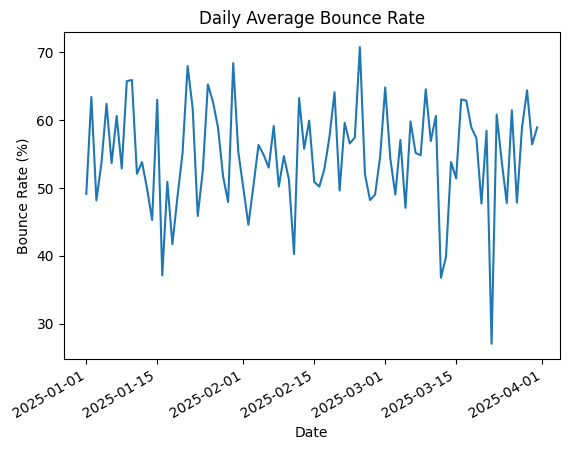

In [31]:
daily_bounce = df.groupby('VisitDate')['BounceRate'].mean()
plt.figure()
daily_bounce.plot()
plt.title("Daily Average Bounce Rate")
plt.xlabel("Date")
plt.ylabel("Bounce Rate (%)")

## Highlight Bounce Rate > 70%

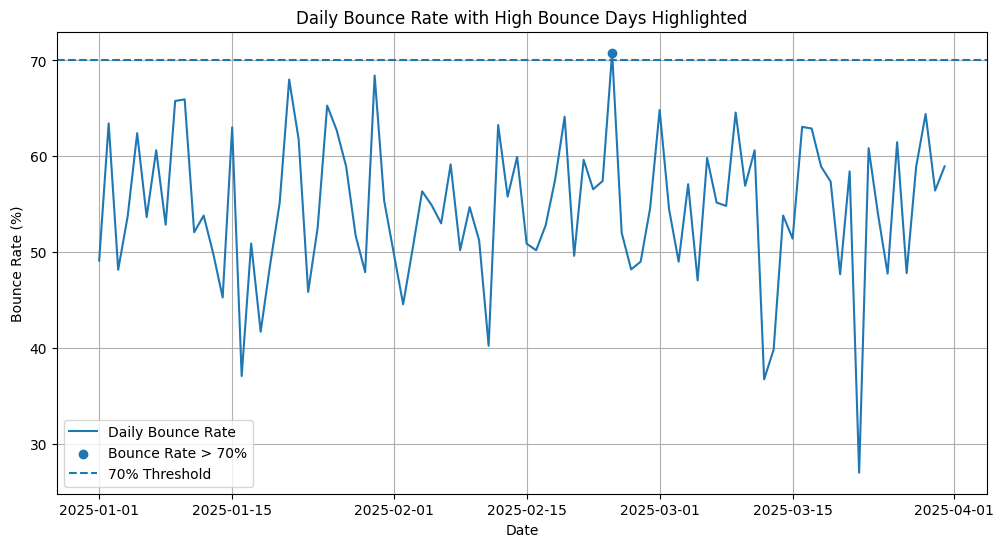

In [37]:
plt.figure(figsize=(12, 6))

plt.plot(daily_bounce.index, daily_bounce.values, label="Daily Bounce Rate")

plt.scatter(
    high_bounce.index,
    high_bounce.values,
    marker='o',
    label="Bounce Rate > 70%"
)
plt.axhline(70, linestyle='--', label="70% Threshold")
plt.title("Daily Bounce Rate with High Bounce Days Highlighted")
plt.xlabel("Date")
plt.ylabel("Bounce Rate (%)")
plt.legend()
plt.grid(True)

plt.show()